In [1]:
import numpy as np
from scipy import stats
from scipy import io as spio
from scipy import misc
from scipy import special
from scipy import integrate
from scipy import linalg
from scipy.spatial.distance import pdist, squareform
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg

import pandas as pd

%matplotlib inline

from sklearn import cluster, datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
df = pd.read_csv('FT_ALL.csv')
stats = df[['stat_1', 'stat_2', 'stat_3']].copy()
stats.head()

,stat_1,stat_2,stat_3
0,60,60,60
1,60,60,60
2,60,60,60
3,60,60,60
4,60,60,60


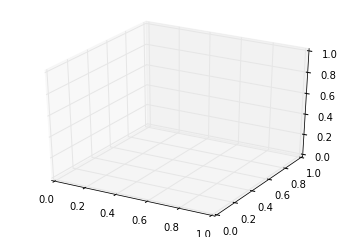

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

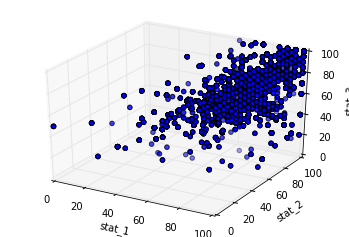

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = stats['stat_1']
y = stats['stat_2']
zs = stats['stat_3']

ax.scatter(x, y, zs)

ax.set_xlim3d(0, 100)
ax.set_ylim3d(0, 100)
ax.set_zlim3d(0, 100)
ax.set_xlabel('stat_1')
ax.set_ylabel('stat_2')
ax.set_zlabel('stat_3')

plt.show()

In [3]:
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(stats) 
print k_means.labels_[::10]

[0 0 0 ..., 1 1 1]


In [4]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(stats)

k_means.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [9]:
# Obtain labels for each point in mesh. Use last trained model.
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

KeyboardInterrupt: 

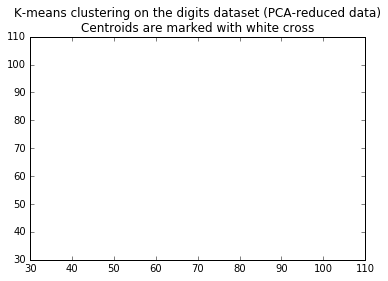

In [13]:
centroids = k_means.cluster_centers_

plt.scatter(centroids[:, 0, ], centroids[:, 1], centroids[]
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')

plt.show()

In [30]:
print type(stats)

<class 'pandas.core.frame.DataFrame'>
